<a href="https://colab.research.google.com/github/cristinarainich/MLTSA22_KRainich/blob/main/train/05_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl
import pandas as pd

In [2]:
np.random.seed(123)

In [4]:
t = np.arange(30)
y = np.random.randn(30) * 2

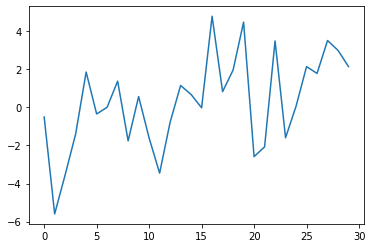

In [5]:
pl.plot(t, y);

In [6]:
ymissing = y.copy()
ymissing[np.random.randint(0, 30, 10)] = np.nan

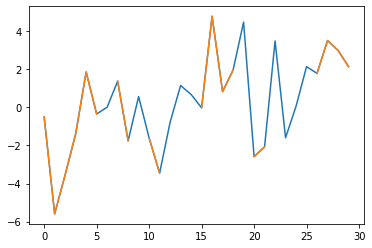

In [7]:
pl.plot(t, y)
pl.plot(t, ymissing);

In [8]:
true_mean = y.mean()
true_std = y.std()

In [9]:
print('true mean {:.2f} true standard deviation {:.2f}'.format(true_mean, true_std))

true mean 0.28 true standard deviation 2.42


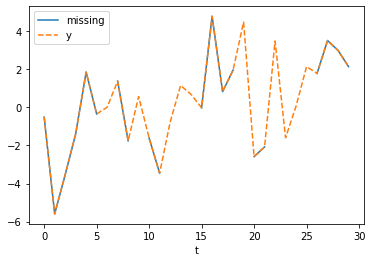

In [16]:
df = pd.DataFrame({'ym':ymissing, 't':t, 'y':y})
ax = df.plot(x = 't', y = 'ym', label='missing');
df.plot(x='t',y='y', ls = '--', ax=ax)

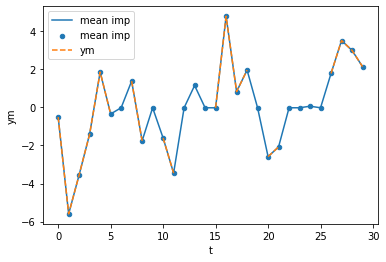

In [33]:
ax = df.fillna(value = df.ym.mean()).plot(x='t', y='ym', label='mean imp')
df.fillna(value=df.ym.mean()).plot(x='t',y='ym', label='mean imp', kind = 'scatter', ax=ax)
df.plot(x='t', y='ym', ls='--', ax=ax);

In [26]:
print('true mean {:.2f} true standard deviation {:.2f}'.format(true_mean, true_std))
print('imputed mean {:.2f} true standard deviation {:.2f}'.format(
    df.fillna(value=df.ym.mean()).ym.mean(),
    df.fillna(value=df.ym.mean()).ym.std()))

true mean 0.28 true standard deviation 2.42
imputed mean -0.02 true standard deviation 2.18


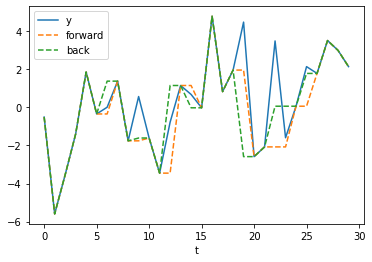

In [37]:
ax = df.plot(x='t',y='y')
df.fillna(method='ffill').plot(x='t',y='ym', ls = '--', ax=ax, label='forward')
df.fillna(method='bfill').plot(x='t',y='ym', ls = '--', ax=ax, label='back');